<a href="https://colab.research.google.com/github/pipuf/ml_dev_cert/blob/main/7_1_1_THEORY_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Feature Engineering

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

plt.rcParams['figure.figsize'] = [10, 6]

In [ ]:
!gdown "1MwZZb2jRsFKeL8lgqSVn0cuv6eZztzR1"

# Load dataset
movies = pd.read_csv('imdb_dataset.csv')
movies.head(10)

Downloading...
From: https://drive.google.com/uc?id=1MwZZb2jRsFKeL8lgqSVn0cuv6eZztzR1
To: /content/imdb_dataset.csv
100% 92.4k/92.4k [00:00<00:00, 3.76MB/s]


,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,NaN,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,NaN,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,NaN,200.0,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,NaN,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NaN,Drama,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
8,8.9,Schindler's List,R,Biography,195.0,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings..."
9,8.9,Fight Club,R,Drama,139.0,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."


## Missing values

In [ ]:
movies.isna().sum()

,0
star_rating,1
title,0
content_rating,1
genre,1
duration,19
actors_list,0


In [ ]:
print(movies.shape)
movies = movies.dropna(subset=['genre', 'duration'])
print(movies.shape)

(979, 6)
(959, 6)


In [ ]:
movies.isna().sum()

,0
star_rating,1
title,0
content_rating,1
genre,0
duration,0
actors_list,0


## Outliers

### Discover with Histogram

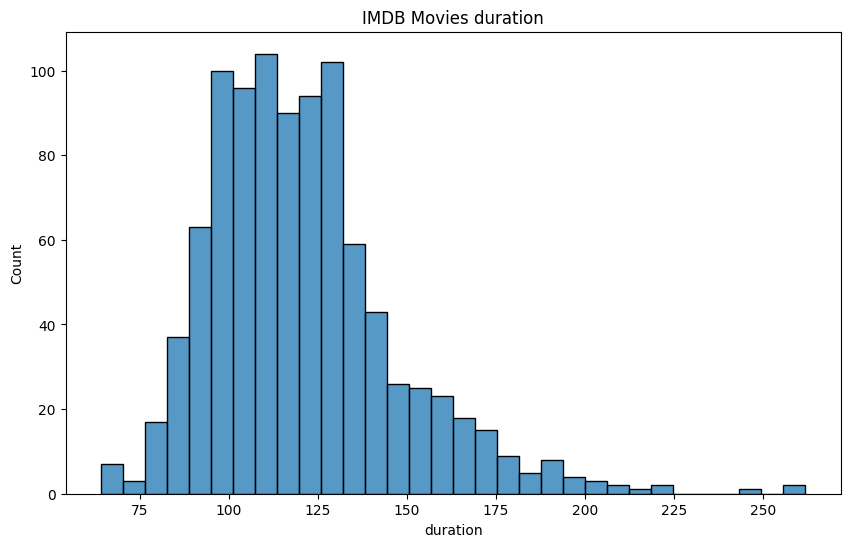

In [ ]:
sns.histplot(movies['duration']).set_title('IMDB Movies duration')
plt.show()

### Discover with BoxPlot

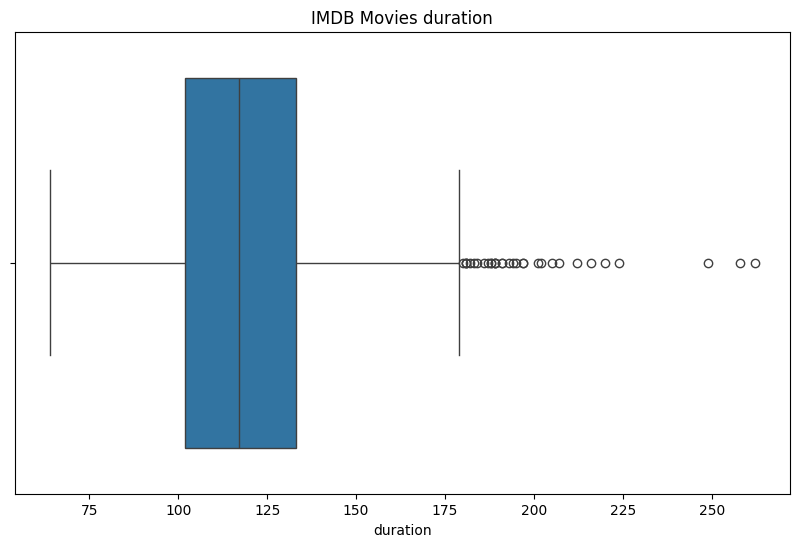

In [ ]:
sns.boxplot(data=movies, x='duration', whis=1.5).set_title('IMDB Movies duration')
plt.show()

In [ ]:
movies['duration']

,duration
1,175.0
4,154.0
5,96.0
6,161.0
7,201.0
...,...
974,116.0
975,118.0
976,138.0
977,114.0


In [ ]:
q1 = np.quantile(movies['duration'], 0.25)
q1

np.float64(102.0)

In [ ]:
q3 = np.percentile(movies['duration'], 75)
q3

np.float64(133.0)

In [ ]:
q1 = np.percentile(movies['duration'], 25)
q3 = np.percentile(movies['duration'], 75)
iqr = q3 - q1

maximum = q3 + 1.5 * iqr
minimum = q1 - 1.5 * iqr

In [ ]:
maximum

np.float64(179.5)

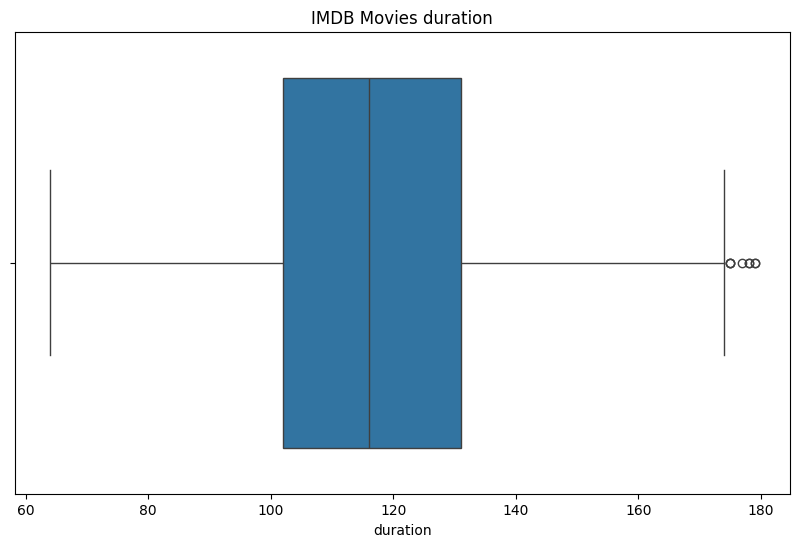

In [ ]:
sns.boxplot(data=movies.query("duration < @maximum and duration > @minimum"), x='duration').set_title('IMDB Movies duration')
plt.show()

In [ ]:
movies.shape

(959, 6)

In [ ]:
movies.query("duration < @maximum and duration > @minimum")

,star_rating,title,content_rating,genre,duration,actors_list
1,NaN,The Godfather,R,Crime,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
4,8.9,Pulp Fiction,R,Crime,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
5,8.9,12 Angry Men,NaN,Drama,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ..."
9,8.9,Fight Club,R,Drama,139.0,"[u'Brad Pitt', u'Edward Norton', u'Helena Bonh..."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116.0,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118.0,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138.0,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114.0,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [ ]:
mean = movies['duration'].mean()
std = movies['duration'].std()

movies['duration_sigmas'] = (movies['duration'] - mean) / std


<Axes: >

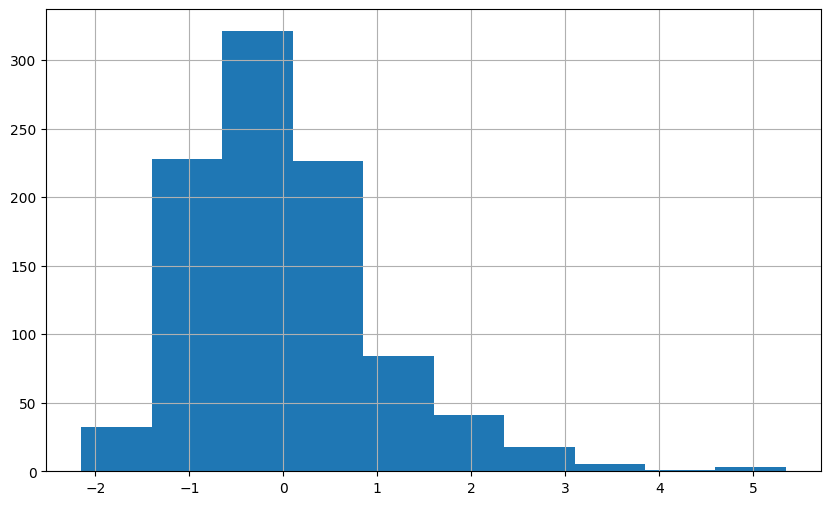

In [ ]:
movies['duration_sigmas'].hist()

In [ ]:
(movies['duration_sigmas'] > 3)

,duration_sigmas
1,False
4,False
5,False
6,False
7,True
...,...
974,False
975,False
976,False
977,False


In [ ]:
movies[(movies['duration_sigmas'].abs() > 3)]

,star_rating,title,content_rating,genre,duration,actors_list,duration_sigmas
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894
17,8.7,Seven Samurai,UNRATED,Drama,207.0,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...",3.265061
78,8.4,Once Upon a Time in America,R,Crime,249.0,"[u'Robert De Niro', u'James Woods', u'Elizabet...",4.855229
85,8.4,Lawrence of Arabia,PG,Adventure,216.0,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...",3.605811
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224.0,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",3.908700
157,8.2,Gone with the Wind,G,Drama,258.0,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",5.195979
204,8.1,Ben-Hur,G,Adventure,212.0,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe...",3.454366
445,7.9,The Ten Commandments,APPROVED,Adventure,220.0,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",3.757256
476,7.8,Hamlet,PG-13,Drama,262.0,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",5.347424
630,7.7,Malcolm X,PG-13,Biography,202.0,"[u'Denzel Washington', u'Angela Bassett', u'De...",3.075755


In [ ]:
movies[(movies['duration_sigmas'] > 3) | (movies['duration_sigmas'] < -3)]

,star_rating,title,content_rating,genre,duration,actors_list,duration_sigmas
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894
17,8.7,Seven Samurai,UNRATED,Drama,207.0,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...",3.265061
78,8.4,Once Upon a Time in America,R,Crime,249.0,"[u'Robert De Niro', u'James Woods', u'Elizabet...",4.855229
85,8.4,Lawrence of Arabia,PG,Adventure,216.0,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...",3.605811
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224.0,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",3.908700
157,8.2,Gone with the Wind,G,Drama,258.0,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",5.195979
204,8.1,Ben-Hur,G,Adventure,212.0,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe...",3.454366
445,7.9,The Ten Commandments,APPROVED,Adventure,220.0,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",3.757256
476,7.8,Hamlet,PG-13,Drama,262.0,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",5.347424
630,7.7,Malcolm X,PG-13,Biography,202.0,"[u'Denzel Washington', u'Angela Bassett', u'De...",3.075755


In [ ]:
movies.query("duration_sigmas > 3 or duration_sigmas < -3")

,star_rating,title,content_rating,genre,duration,actors_list,duration_sigmas
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894
17,8.7,Seven Samurai,UNRATED,Drama,207.0,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K...",3.265061
78,8.4,Once Upon a Time in America,R,Crime,249.0,"[u'Robert De Niro', u'James Woods', u'Elizabet...",4.855229
85,8.4,Lawrence of Arabia,PG,Adventure,216.0,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony...",3.605811
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224.0,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",3.908700
157,8.2,Gone with the Wind,G,Drama,258.0,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",5.195979
204,8.1,Ben-Hur,G,Adventure,212.0,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe...",3.454366
445,7.9,The Ten Commandments,APPROVED,Adventure,220.0,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",3.757256
476,7.8,Hamlet,PG-13,Drama,262.0,"[u'Kenneth Branagh', u'Julie Christie', u'Dere...",5.347424
630,7.7,Malcolm X,PG-13,Biography,202.0,"[u'Denzel Washington', u'Angela Bassett', u'De...",3.075755


## Categorical Features

In [ ]:
movies[['title', 'genre']]

,title,genre
1,The Godfather,Crime
4,Pulp Fiction,Crime
5,12 Angry Men,Drama
6,"The Good, the Bad and the Ugly",Western
7,The Lord of the Rings: The Return of the King,Adventure
...,...,...
974,Tootsie,Comedy
975,Back to the Future Part III,Adventure
976,Master and Commander: The Far Side of the World,Action
977,Poltergeist,Horror


In [ ]:
movies.genre.value_counts()

,count
genre,
Drama,275
Comedy,155
Action,131
Crime,120
Adventure,73
Biography,72
Animation,62
Horror,29
Mystery,16


In [ ]:
movies_dummies = pd.get_dummies(movies, columns=['genre'])
movies_dummies

,star_rating,title,content_rating,duration,actors_list,duration_sigmas,genre_Action,genre_Adventure,genre_Animation,genre_Biography,...,genre_Drama,genre_Family,genre_Fantasy,genre_Film-Noir,genre_History,genre_Horror,genre_Mystery,genre_Sci-Fi,genre_Thriller,genre_Western
1,NaN,The Godfather,R,175.0,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",2.053504,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,8.9,Pulp Fiction,R,154.0,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",1.258419,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,8.9,12 Angry Men,NaN,96.0,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",-0.937527,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,161.0,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",1.523448,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
7,8.9,The Lord of the Rings: The Return of the King,PG-13,201.0,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",3.037894,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,116.0,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",-0.180304,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
975,7.4,Back to the Future Part III,PG,118.0,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",-0.104582,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
976,7.4,Master and Commander: The Far Side of the World,PG-13,138.0,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",0.652641,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
977,7.4,Poltergeist,PG,114.0,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",-0.256027,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


## Feature Binning

In [ ]:
movies['duration'].head()

,duration
1,175.0
4,154.0
5,96.0
6,161.0
7,201.0


In [ ]:
duration_bins = pd.qcut(movies['duration'], q=[0, 0.25, 0.5, 0.75, 1])
duration_bins.value_counts()

,count
duration,
"(63.999, 102.0]",247
"(102.0, 117.0]",239
"(133.0, 262.0]",237
"(117.0, 133.0]",236


In [ ]:
duration_bins = pd.cut(movies['duration'], bins=10)
duration_bins.value_counts()

,count
duration,
"(103.6, 123.4]",321
"(83.8, 103.6]",228
"(123.4, 143.2]",226
"(143.2, 163.0]",84
"(163.0, 182.8]",41
"(63.802, 83.8]",32
"(182.8, 202.6]",18
"(202.6, 222.4]",5
"(242.2, 262.0]",3


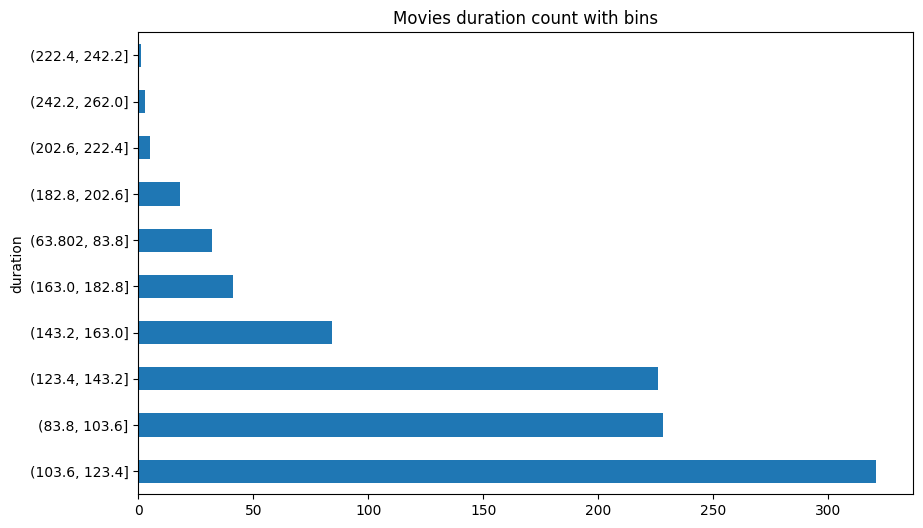

In [ ]:
duration_bins.value_counts().plot(kind='barh').set_title('Movies duration count with bins')
plt.show()

## Feature normalization

### Min-Max

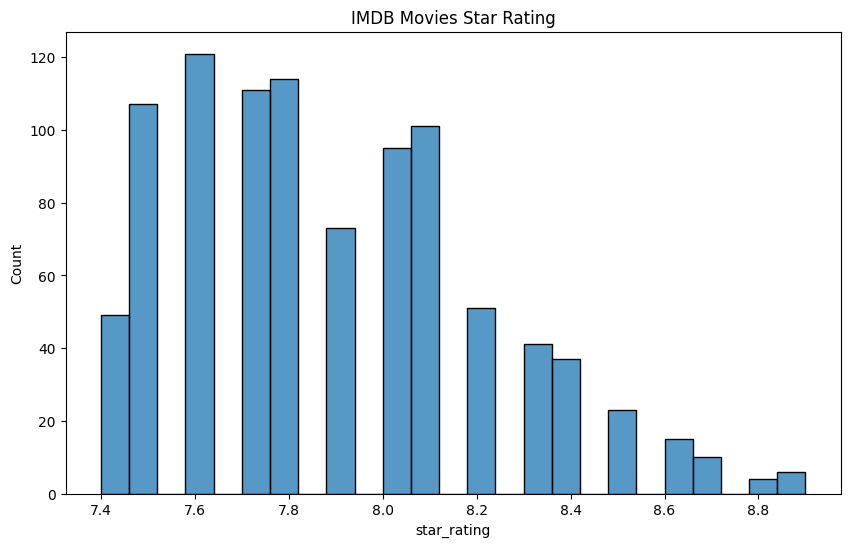

In [ ]:
sns.histplot(movies['star_rating'], bins=25).set_title('IMDB Movies Star Rating')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [ ]:
movies[['star_rating']]

,star_rating
1,NaN
4,8.9
5,8.9
6,8.9
7,8.9
...,...
974,7.4
975,7.4
976,7.4
977,7.4


In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=False)
mm_scaler.fit(movies[['star_rating']])

MinMaxScaler()

In [ ]:
# define the scaler and fit it
mm_scaler = MinMaxScaler(feature_range=(0, 2), clip=False)
mm_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

# transform movies['star_rating']
movies['star_rating_min-max'] = mm_scaler.transform(movies['star_rating'].values.reshape(-1, 1))



In [ ]:
movies[['star_rating', 'star_rating_min-max']].sample(10)

,star_rating,star_rating_min-max
8,8.9,2.000000
626,7.7,0.400000
409,7.9,0.666667
85,8.4,1.333333
326,8.0,0.800000
63,8.4,1.333333
469,7.8,0.533333
147,8.2,1.066667
862,7.5,0.133333
455,7.9,0.666667


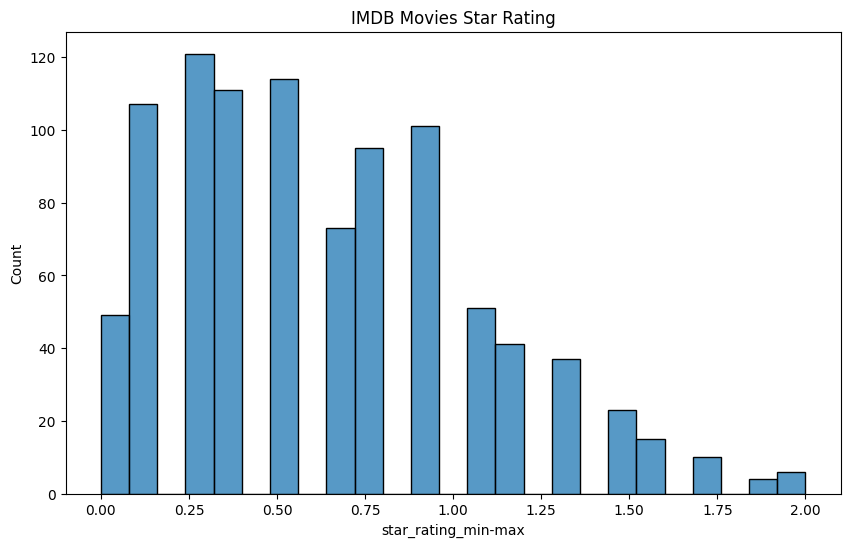

In [ ]:
sns.histplot(movies['star_rating_min-max'], bins=25).set_title('IMDB Movies Star Rating')
plt.show()

#### Store to disk

In [ ]:
type(mm_scaler)

sklearn.preprocessing._data.MinMaxScaler

In [ ]:
import pickle

# Write to disk using pickle
with open("mm_scaler.pkl", "wb") as f:
  pickle.dump(mm_scaler, f)

# Load later from disk
with open("mm_scaler.pkl", "rb") as f:
  mm_scaler_loaded = pickle.load(f)


In [ ]:
# Test both objets output same results
print(mm_scaler_loaded.transform([[7.8]]))
print(mm_scaler.transform([[7.8]]))


[[0.53333333]]
[[0.53333333]]


We can see the data has the same distribution.

Now, what happens if we try to scale data values which are out of our sample distribution but still valid values?

In [ ]:
mm_scaler.transform([[3]])

array([[-5.86666667]])

In [ ]:
mm_scaler.transform([[5]])

array([[-3.2]])

In [ ]:
mm_scaler.transform([[9.3]])

array([[2.53333333]])

What if `clip=True`?

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1), clip=True)
mm_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

MinMaxScaler(clip=True)

In [ ]:
mm_scaler.transform([[5]])

array([[0.]])

In [ ]:
mm_scaler.transform([[9.3]])

array([[1.]])

In [ ]:
mm_scaler.transform([[9.5]])

array([[1.]])

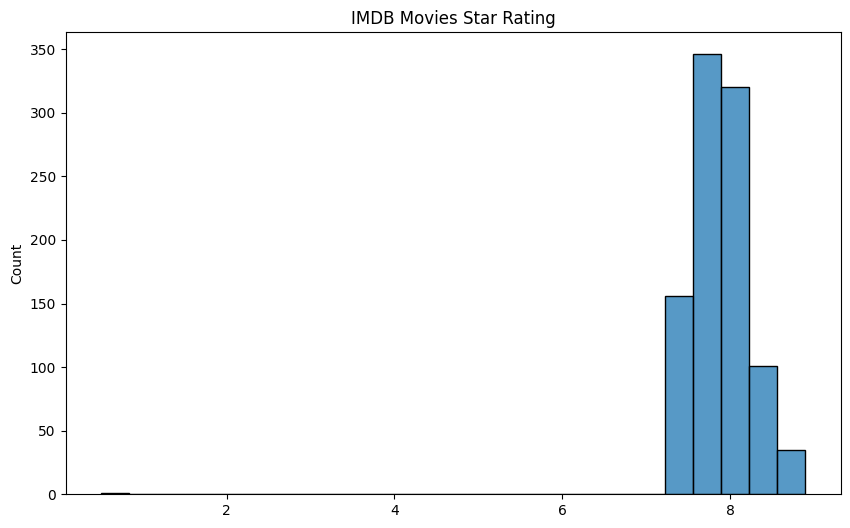

In [ ]:
new_star_rating = movies['star_rating'].tolist()
new_star_rating.append(0.5)

sns.histplot(new_star_rating, bins=25).set_title('IMDB Movies Star Rating')
plt.show()

In [ ]:
mm_scaler = MinMaxScaler(feature_range=(0, 1))
new_star_rating_mm = mm_scaler.fit_transform(np.array(new_star_rating).reshape(-1, 1))


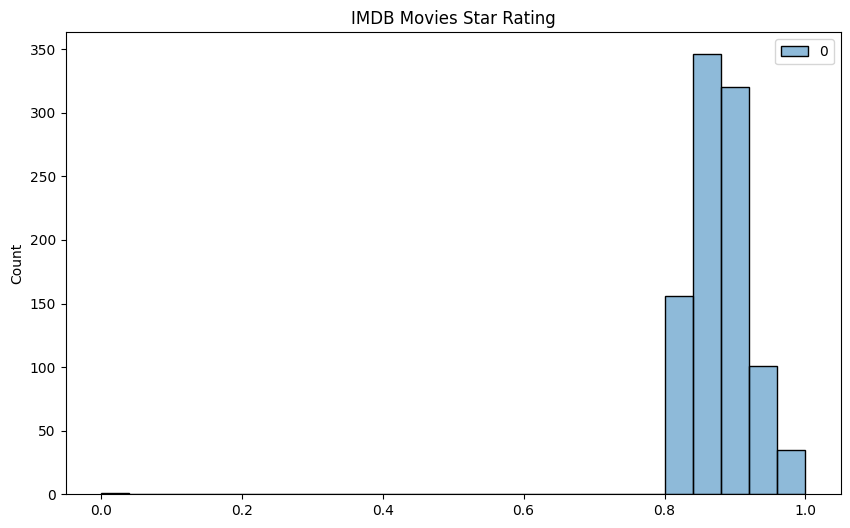

In [ ]:
sns.histplot(new_star_rating_mm, bins=25).set_title('IMDB Movies Star Rating')
plt.show()

### Z-Score

In [ ]:
movies['star_rating'].describe()

,star_rating
count,958.000000
mean,7.883925
std,0.326874
min,7.400000
25%,7.600000
50%,7.800000
75%,8.100000
max,8.900000


In [ ]:
std_scaler = StandardScaler()
std_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

movies['star_rating_std'] = std_scaler.transform(movies['star_rating'].values.reshape(-1, 1))

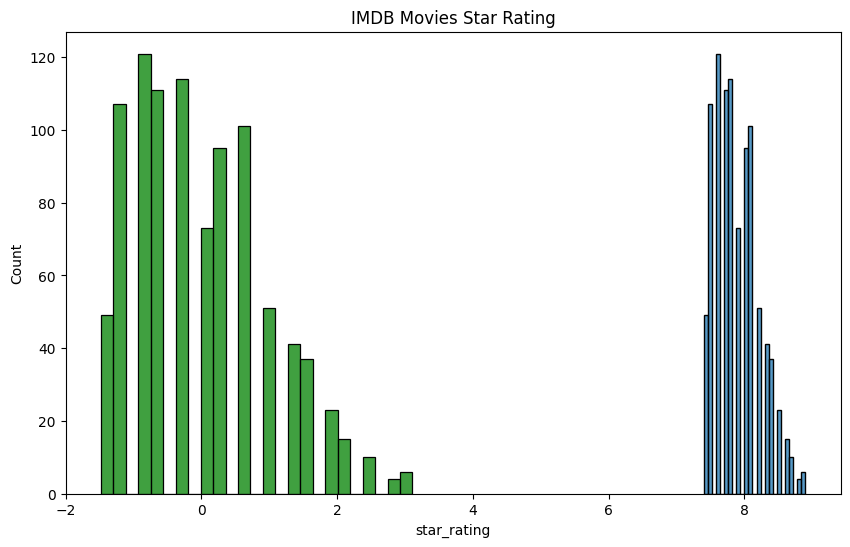

In [ ]:
sns.histplot(movies['star_rating'], bins=25)
sns.histplot(movies['star_rating_std'], bins=25, color='g').set_title('IMDB Movies Star Rating')
plt.show()

In [ ]:
sr_mean = movies['star_rating'].mean()
sr_std = movies['star_rating'].std()
sr_scaled = (movies['star_rating'] - sr_mean) / sr_std


In [ ]:
sr_scaled

,star_rating
1,NaN
4,3.108458
5,3.108458
6,3.108458
7,3.108458
...,...
974,-1.480461
975,-1.480461
976,-1.480461
977,-1.480461


In [ ]:
movies['star_rating_std'].iloc[0]

nan

In [ ]:
std_scaler.transform([[3]])

array([[-14.94909429]])

In [ ]:
(3 - sr_mean) / sr_std

-14.941290009795049

In [ ]:
std_scaler.transform([[5]])

array([[-8.82733985]])

In [ ]:
std_scaler.transform([[9.5]])

array([[4.94660763]])

In [ ]:
std_scaler = StandardScaler()


In [ ]:
std_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

StandardScaler()

In [ ]:
std_scaler.transform(np.array([2., 8, 10, 20]).reshape(-1, 1))

array([[-18.00997151],
       [  0.3552918 ],
       [  6.47704624],
       [ 37.08581842]])

In [ ]:
std_scaler.fit_transform(movies['star_rating'].values.reshape(-1, 1))

array([[        nan],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 3.1100813 ],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.80399358],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.49790586],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 2.19181813],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1.88573041],
       [ 1

In [ ]:
std_scaler.fit(movies['star_rating'].values.reshape(-1, 1))

StandardScaler()

In [ ]:
std_scaler.transform(movies['star_rating'].values.reshape(-1, 1))